<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-Emotion-Detection-using-Convolutional-Neural-Networks-" data-toc-modified-id="-Emotion-Detection-using-Convolutional-Neural-Networks--1"><span class="toc-item-num">1&nbsp;&nbsp;</span> Emotion Detection using Convolutional Neural Networks </a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Necessary-libraries-and-packages" data-toc-modified-id="Necessary-libraries-and-packages-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Necessary libraries and packages</a></span></li><li><span><a href="#Exploring-the-data" data-toc-modified-id="Exploring-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploring the data</a></span><ul class="toc-item"><li><span><a href="#Visualising-our-data" data-toc-modified-id="Visualising-our-data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Visualising our data</a></span></li><li><span><a href="#Contribution-of-individual-emotions" data-toc-modified-id="Contribution-of-individual-emotions-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Contribution of individual emotions</a></span></li><li><span><a href="#Augmentation:" data-toc-modified-id="Augmentation:-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Augmentation:</a></span></li><li><span><a href="#Creating-Data-Splits" data-toc-modified-id="Creating-Data-Splits-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Creating Data Splits</a></span><ul class="toc-item"><li><span><a href="#Separating-target-from-images" data-toc-modified-id="Separating-target-from-images-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Separating target from images</a></span></li></ul></li><li><span><a href="#Splitting-the-data" data-toc-modified-id="Splitting-the-data-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Splitting the data</a></span></li></ul></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Modelling</a></span></li><li><span><a href="#Assessing-our-model-performance" data-toc-modified-id="Assessing-our-model-performance-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Assessing our model performance</a></span><ul class="toc-item"><li><span><a href="#Confusion-Matrix" data-toc-modified-id="Confusion-Matrix-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Confusion Matrix</a></span></li><li><span><a href="#Visualizing-predictions" data-toc-modified-id="Visualizing-predictions-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Visualizing predictions</a></span></li><li><span><a href="#Classification-report" data-toc-modified-id="Classification-report-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Classification report</a></span></li></ul></li></ul></div>

<h1> Emotion Detection using Convolutional Neural Networks </h1>

Given an image of a person's face , we must be able to predict the person's emotion.

This is a classification problem

We shall try to achieve this by using a simple Convolutional Neural Network

# Data

The data is obtained from the ICML(International Conference on Machine Learning) faces dataset.

The data and its description is available here https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data

The data contains around 25000 samples

# Necessary libraries and packages

In [29]:
import pandas as pd
import numpy as np
import PIL
import json
import os
import pickle
import cv2
import math
import sklearn
import random
import seaborn as sns
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.backend as K
from tensorflow.keras import optimizers,layers
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.initializers import glorot_uniform
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.layers import Add,Concatenate,Dense,Dropout,Flatten,Conv2D,AveragePooling2D,BatchNormalization,Input,MaxPooling2D,MaxPool2D,ZeroPadding2D,Activation

Setting the seed for reproducability of results

In [3]:
random.seed = 42
tf.random.set_seed(42)

# Exploring the data

In [4]:
face_df = pd.read_csv("icml_face_data.csv")
face_df

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
3,2,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
4,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...
...,...,...
24563,3,0 39 81 80 104 97 51 64 68 46 41 67 53 68 70 5...
24564,0,181 177 176 156 178 144 136 132 122 107 131 16...
24565,3,178 174 172 173 181 188 191 194 196 199 200 20...
24566,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...


In [5]:
face_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24568 entries, 0 to 24567
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  24568 non-null  int64 
 1    pixels  24568 non-null  object
dtypes: int64(1), object(1)
memory usage: 384.0+ KB


There seems to be a slight difficulty in accessing pixels column of our dataframe due the whitespace at the beginning.

In [6]:
face_df['pixels'] = face_df[' pixels']
face_df.drop(' pixels',axis=1,inplace=True)
face_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24568 entries, 0 to 24567
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  24568 non-null  int64 
 1   pixels   24568 non-null  object
dtypes: int64(1), object(1)
memory usage: 384.0+ KB


In [7]:
face_df['pixels'][0]

'70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92

Based on our observation and after reading the data description, we come to the conclusion that the pixels column of our data is actually a string containing spaced pixel values corresponding to a 48x48 grayscale image.

TODO:

* We need to convert the pixel values to numerical format.

* Also we shall resize all the images to 96x96.

In [8]:
def str_to_num(x):
    return np.array(x.split(' ')).reshape(48,48).astype('float32')
def resize_img(x):
    return cv2.resize(x,(96,96),interpolation = cv2.INTER_CUBIC)

In [9]:
def transform_pixels(df):
    df = df.copy()
    
    df['pixels'] = df['pixels'].apply(lambda x : str_to_num(x))
    df['pixels'] = df['pixels'].apply(lambda x : resize_img(x))
    
    return df

face_df = transform_pixels(face_df)

In [10]:
face_df['pixels'][0].shape

(96, 96)

Now that our data has been transformed into a usable form, we can focus on exploring our data further

In [11]:
face_df.isna().sum()

emotion    0
pixels     0
dtype: int64

There are no missing values in our data.

Based on the data description, we know that the target column(emotion) contains numerical mappings of different types of emotions

In [12]:
face_df['emotion'].value_counts()

3    8989
2    6077
0    4953
4    4002
1     547
Name: emotion, dtype: int64

We see that there are 5 categories of emotions in our dataset

Let's define a dictionary for the mappings that makes the exploration a bit easier

In [13]:
num_to_labels = {0:'angry', 1:'disgusted', 2:'sad', 3:'happy', 4: 'surprised'}

## Visualising our data

Let's try visualizing the images from our data

In [14]:
def viz_emotions(df,choice = None,plot_num=16,size = 20):
    """
    Takes in number of random samples to plot along with the dataframe
    """
    
    if choice != None:
        plt.imshow(df['pixels'][choice],cmap = 'gray')
        plt.title(num_to_labels.get(df['emotion'][choice]))
    else:
        fig = plt.figure(figsize=(size, size))
        cells = round(sqrt(plot_num))
        for cell in range(plot_num):
            choice = random.randint(0,len(df))
            ax = fig.add_subplot(cells,cells,cell+1)
            image = plt.imshow(df['pixels'][choice],cmap = 'gray')
            plt.title(num_to_labels.get(df['emotion'][choice]))

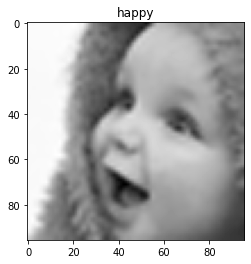

In [15]:
viz_emotions(face_df,40)  # Plotting the 40th image in our dataset

Let's try to plot and view a grid of images

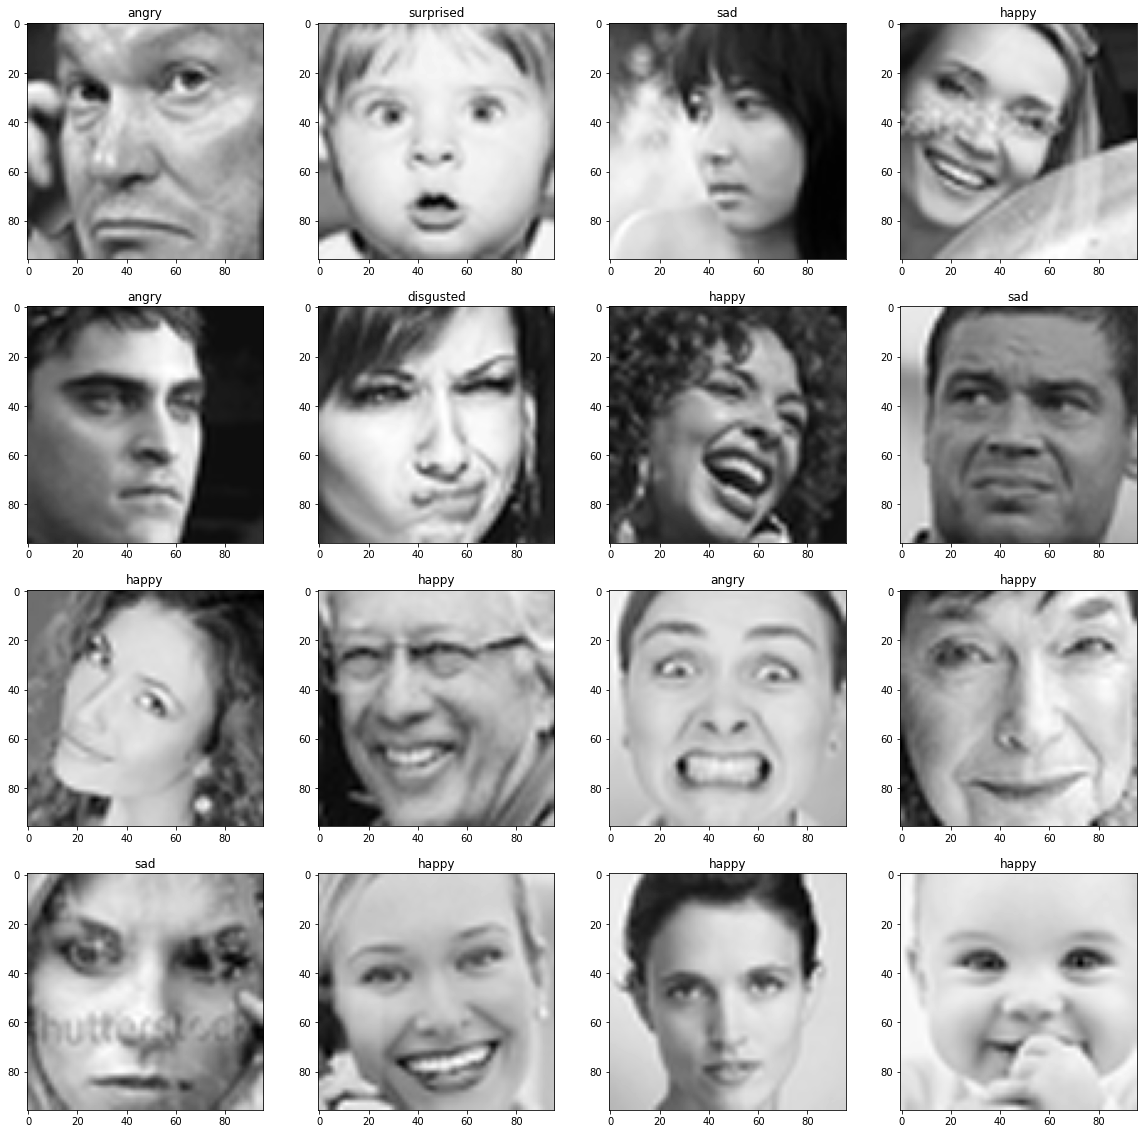

In [16]:
viz_emotions(face_df)

So, we got a glimpse of our data through the plotting function we defined.

## Contribution of individual emotions

It would be useful to know how much has each emotion category contributed to our data.That wauy we can identify if our dataset is skewed.

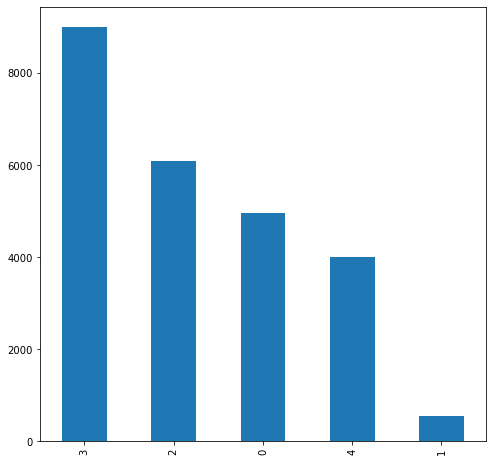

In [17]:
def check_contribution(df):
    plt.figure(figsize=(8,8))
    df['emotion'].value_counts().plot(kind='bar') 
        
check_contribution(face_df)

In [18]:
num_to_labels

{0: 'angry', 1: 'disgusted', 2: 'sad', 3: 'happy', 4: 'surprised'}

We see that the 'happy' emotion category has the most number of samples and the 'disgusted' emotion type contributes a relatively smaller part

## Augmentation:

In the Facial keypoints detection task, we manually performed some custom defined augmentation on our data.That was because, we needed to keep track of the changes to target variable with respect to every augmenatation.

But now, for detecting a person's emotion, the target variable(emotion) doesn't generally change the person's emotion, unless you perform rigorous transformations on the person's face like switching their eyes for ears etc.

So, we shall make use of the keras ImageDataGenerator to augment our images

In [19]:
train_datagen = ImageDataGenerator(
    rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    fill_mode = "nearest")

## Creating Data Splits

Since we have a huge number of samples, we shall try to split the data into 3 sets.

### Separating target from images

Since emotion is a type of nominal variable, we do not want to introduce any kind of inherent order into our targets while feeding to our neural network

So, we go with OneHot Encoding of the target

In [20]:
from keras.utils import to_categorical

X = face_df['pixels']
y = to_categorical(face_df['emotion'])

Using TensorFlow backend.


In [21]:
X.shape

(24568,)

We see that X is yet to be reshaped into the required format for feeding to the neural network

In [22]:
y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

Reshaping the data

In [23]:
X= X/255.0

X= np.stack(X,axis=0)

X = X.reshape(24568, 96, 96, 1)

## Splitting the data

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.1,shuffle=True,random_state=42)
X_val,X_test,y_val,y_test = train_test_split(X_test,y_test,test_size=0.5,shuffle=True,random_state=42)

In [25]:
print(X_train.shape,X_test.shape,X_val.shape)
print(y_train.shape,y_test.shape,y_val.shape)

(22111, 96, 96, 1) (1229, 96, 96, 1) (1228, 96, 96, 1)
(22111, 5) (1229, 5) (1228, 5)


Let us save the test splits for future use

In [26]:
type(X_test)

numpy.ndarray

In [30]:
class NumpyEncoder(json.JSONEncoder):
    """ Special json encoder for numpy types """
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)

In [31]:
to_dump = json.dumps(X_test, cls=NumpyEncoder)

with open('trained_models/emotion_test_split.json', 'w') as f:
    json.dump(to_dump, f)

So now we've got the data splits.We move onto defining our CNN

# Modelling

We shall use a version of the Resnet model using residual blocks

In [ ]:
def res_block(X, filter, stage):
    # Convolutional_block
    X_copy = X

    f1 , f2, f3 = filter

    # Main Path
    X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = MaxPool2D((2,2))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)


    # Short path
    X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
    X_copy = MaxPool2D((2,2))(X_copy)
    X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

    # ADD
    X = Add()([X,X_copy])
    X = Activation('relu')(X)

    # Identity Block 1
    X_copy = X


    # Main Path
    X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

    # ADD
    X = Add()([X,X_copy])
    X = Activation('relu')(X)

    # Identity Block 2
    X_copy = X


    # Main Path
    X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
    X = Activation('relu')(X) 

    X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

    # ADD
    X = Add()([X,X_copy])
    X = Activation('relu')(X)

    return X

In [ ]:
input_shape = (96, 96, 1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3, 3))(X_input)

# 1 - stage
X = Conv2D(64, (7, 7), strides= (2, 2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3, 3), strides= (2, 2))(X)

# 2 - stage
X = res_block(X, filter= [64, 64, 256], stage= 2)

# 3 - stage
X = res_block(X, filter= [128, 128, 512], stage= 3)

# 4 - stage
# X = res_block(X, filter= [256, 256, 1024], stage= 4)

# Average Pooling
X = AveragePooling2D((4, 4), name = 'Averagea_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(5, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(X)

emotion_model = Model( inputs= X_input, outputs = X, name = 'Resnet18')

emotion_model.summary()

In [ ]:
emotion_model.compile(optimizer='Adam', loss= 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)

# save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath = "FacialExpression_weights.hdf5", verbose = 1, save_best_only=True)

history = emotion_model.fit(train_datagen.flow(X_train, y_train, batch_size=64),
                                validation_data=(X_val, y_val), steps_per_epoch=len(X_train) // 64,
                                epochs= 2, callbacks=[checkpointer, earlystopping])

model_json = emotion_model.to_json()
with open("FacialExpression-model.json","w") as json_file:
    json_file.write(model_json)

# Assessing our model performance

Now that we have trained our emotion detection model and saved its architecture and weights locally, we can load the model when we want.

We shall do so now , and evaluate our model's performance on the test split

In [ ]:
with open('emotion.json', 'r') as json_file:
    json_savedModel= json_file.read()
    
# load the model architecture 
emotion_model = tf.keras.models.model_from_json(json_savedModel)
emotion_model.load_weights('weights_emotions.hdf5')
emotion_model.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
test_acc = emotion_model.evaluate(X_test,y_test)
print(f"Test accuracy {test_acc}")

In [ ]:
train_acc = emotion_model.evaluate(X_train,y_train)
print(f"Test accuracy {train_acc}")

We are able to achieve an accuracy of almost 87% on both the test and train splits.

True Labels

In [ ]:
y_true = np.argmax(y_test,axis=-1)

In [ ]:
y_true.shape

Predicted Labels

In [ ]:
predicted_classes = np.argmax(emotion_model.predict(X_test),axis=-1)

In [ ]:
predicted_classes.shape

## Confusion Matrix

We shall use the confusion matrix to see how well our model has predicted among the different classes

In a confusion matrix, the labels on x axis represent the true labels, whereas the ones on the y axis are the predicted labels

For eg: If the value corresponding to the column '2' and row '3' is 10,
    it means that 10 samples of the 2nd type of emotion(sad), in the TEST split, were predicted by our model as the 3rd type of emotion(happy).
    

In [ ]:
cm = confusion_matrix(y_true,predicted_classes)
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True,fmt= '.0f')
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.show()

## Visualizing predictions

Let's try to visualize some of the model's predictions along with the image fed

In [ ]:
def viz_preds(y_true,y_pred,L=5,W=5):
    fig,axes = plt.subplots(L,W,figsize=(L*W,L*W))
    axes = axes.ravel()
    
    for i in np.arange(0,L*W):
        axes[i].imshow(X_test[i].reshape(96,96),cmap = 'gray')
        if y_pred[i] == y_true[i]:
            color = 'green'
        else:
            color = 'red'
        axes[i].set_title(label = f"Prediction - {num_to_labels.get(y_pred[i])}\n True - {num_to_labels.get(y_true[i])}",color = color)
        axes[i].axis('off')
    plt.subplots_adjust(wspace = 1)

viz_preds(y_true,predicted_classes) 
    

We see that our model performs well on the test set, making mistakes mostly only in reasonably confusing cases.

## Classification report

We shall use a classification report to assess the precision, recall and F1 score of our model's predictions on the test data

Consider the case of emotion 3 (happy):
    
    Precision - Ratio of the number of truly happy faces to the number of faces predicted as happy
    
    Recall - Ratio of the number of truly happy faces as predicted by our model to the actual number of happy faces in the test set
    
    F1 score is just a metric based on Precision and Recall.
    
    F1 Score = (2 * precision * recall) / (precision + recall)
    
    
  And likewise for the other categories

In [ ]:
print(classification_report(y_true,predicted_classes))

The weighted average, also takes into account the number of samples in test set falling into each particular category.